In [11]:
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

#### Chapter wise polarity analysis.

Let's create a dict with the chapter filenames as keys and the chapter text as values.

In [8]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

mb_dir = '../2_Text_Preprocessing/TMBD_Chapters_lemma'

mb_chapter_texts = {}

for filename in os.listdir(mb_dir):
    filepath =  os.path.join(mb_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        mb_chapter_texts[filename] = chapter_text

In [9]:
# Combine all chapters to one list of chapter text
# one element of the list = one chapter

ir_dir = '../2_Text_Preprocessing/IR_Chapters_lemma'

ir_chapter_texts = {}

for filename in os.listdir(ir_dir):
    filepath =  os.path.join(ir_dir, filename)
    with open(filepath, 'r', encoding='utf-8') as chapter_file:
        chapter_text = chapter_file.read()
        ir_chapter_texts[filename] = chapter_text

now, create a list of chapter sentiments

In [14]:
# for the MB series

analyzer = SentimentIntensityAnalyzer()

mb_chapter_sentiments = {}

for chapter in mb_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(mb_chapter_texts[chapter])
    mb_chapter_sentiments[chapter] = sentiment_score

In [15]:
# for the IR series

analyzer = SentimentIntensityAnalyzer()

ir_chapter_sentiments = {}

for chapter in ir_chapter_texts.keys():
    sentiment_score = analyzer.polarity_scores(ir_chapter_texts[chapter])
    ir_chapter_sentiments[chapter] = sentiment_score

Converting the scores in dataframes

In [19]:
mb_sentiment_df = pd.DataFrame(mb_chapter_sentiments).T
mb_sentiment_df.sort_index(inplace=True)
# encountering the same chapter numbering problem here.

In [20]:
ir_sentiment_df = pd.DataFrame(ir_chapter_sentiments).T
ir_sentiment_df.sort_index(inplace=True)

Plotting the sentiment scores now

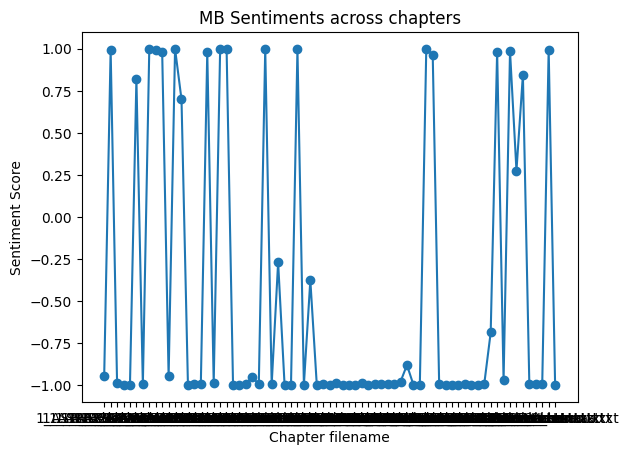

In [23]:
# MB series

plt.plot(mb_sentiment_df.index, mb_sentiment_df['compound'], marker='o')
plt.title('MB Sentiments across chapters')
plt.xlabel('Chapter filename')
plt.ylabel('Sentiment Score')
plt.show()

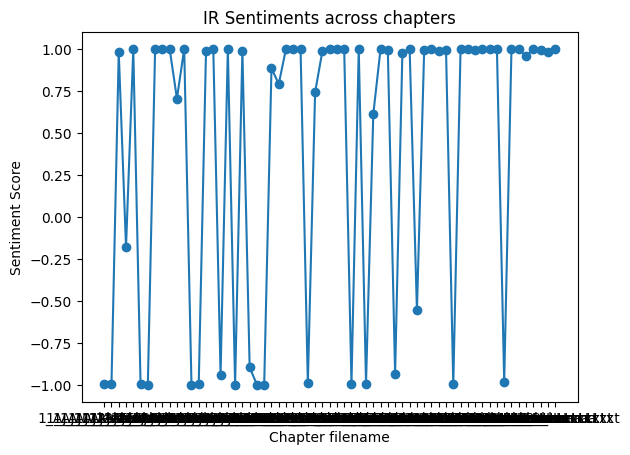

In [24]:
# IR series

plt.plot(ir_sentiment_df.index, ir_sentiment_df['compound'], marker='o')
plt.title('IR Sentiments across chapters')
plt.xlabel('Chapter filename')
plt.ylabel('Sentiment Score')
plt.show()

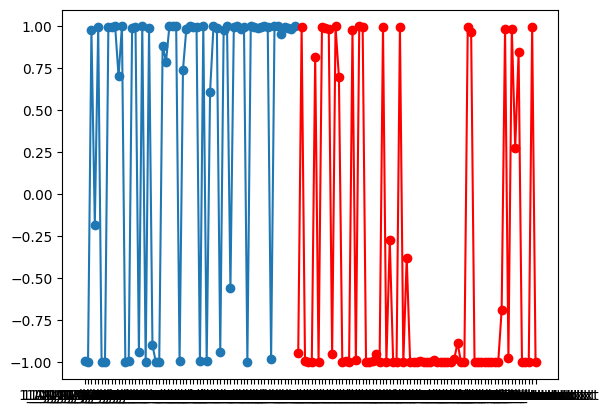

In [26]:
# Combined plot

plt.plot(ir_sentiment_df.index, ir_sentiment_df['compound'], marker='o')
plt.plot(mb_sentiment_df.index, mb_sentiment_df['compound'], marker='o', color='red')
plt.show()

Okay before i move on, need to solve the chapter order problem. the figure above is really ugly but shows the problem that if i want to compare chapters i need to number them accordingly. tho ugly, i can see overall positive sentiment is there more in the IR series than MB series. which is very unexpected. i thought IR was more depressing. 

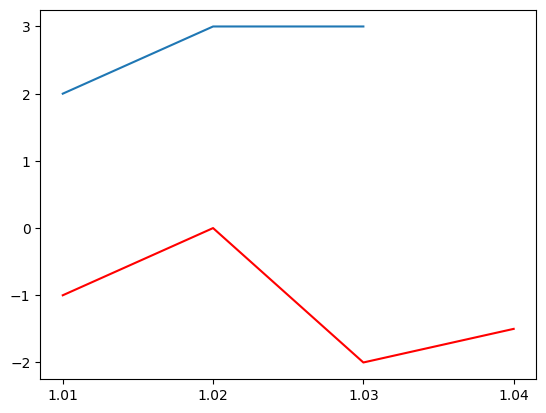

In [27]:
dict_1 = {'1.01': 2, '1.02': 3, '1.03': 3}
dict_2 = {'1.01': -1, '1.02': 0, '1.03': -2, '1.04': -1.5}

ser_1 = pd.Series(dict_1)
ser_2 = pd.Series(dict_2)

plt.plot(ser_1.index, ser_1)
plt.plot(ser_2.index, ser_2, color='red')
plt.show()